### Ameya on 12-April-2017 for AppMeter
### This file has logic for DecisionTreeRegressor for predicting the number of downloads

In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
from math import log

# this allows plots to appear directly in the notebook
%matplotlib inline


In [3]:
#data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
#data1 = pd.read_csv("union.csv", low_memory=False)
#data1 = pd.read_excel("union2.xlsx")
AllCleanedApps = pd.read_csv("CleanedApps.csv")
AllCleanedApps.shape
AllCleanedApps.head(5)

(329809, 8)

,Unnamed: 0,Random,Name,Downloads,Size,Price,AvgR,Raters
0,0,0.550750,Merry Christmas 2014 WPs,100,5600.0,0.10,2.50,2
1,1,0.690841,GuiaTDT,1000,1200.0,0.10,3.73,11
2,2,0.191126,???? ?????? GPS,50000,857.0,0.10,4.01,172
3,3,0.463945,Spritual Gifts,500,2700.0,0.10,3.58,12
4,4,0.121634,Space War SE,100,4200.0,0.99,3.60,5


In [4]:
#Change the table values to log values
import math
def toLog(x):
    y = x
    if x == 0:
        y = 0.1
    return math.log(y)



In [5]:
AllCleanedApps["Downloads"] = AllCleanedApps.Downloads.apply(toLog)
AllCleanedApps["Size"] = AllCleanedApps.Size.apply(toLog)
#AllCleanedApps["Price"] = AllCleanedApps.Price.apply(toLog)
#AllCleanedApps["AvgR"] = AllCleanedApps.AvgR.apply(toLog)
AllCleanedApps["Raters"] = AllCleanedApps.Raters.apply(toLog)

In [6]:
import sklearn.tree as tree
import sklearn as sk
from sklearn.model_selection import train_test_split

Y=AllCleanedApps['Downloads']
X=AllCleanedApps.drop(['Downloads', 'Name','Unnamed: 0', 'Random'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

X_train.shape
y_train.shape
X_train.head(3)
y_train.head(3)
X_test.shape
y_test.shape

(230866, 4)

(230866L,)

,Size,Price,AvgR,Raters
224644,6.811244,0.1,5.00,0.000000
238305,7.696213,0.1,4.24,5.262690
116128,6.614726,0.1,5.00,1.386294


224644    4.60517
238305    9.21034
116128    4.60517
Name: Downloads, dtype: float64

(98943, 4)

(98943L,)

In [8]:
import numpy as np
#dt = tree.DecisionTreeClassifier(max_depth=5)
dt = tree.DecisionTreeRegressor(max_depth=7)
dt.fit(X = X_train, y= y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

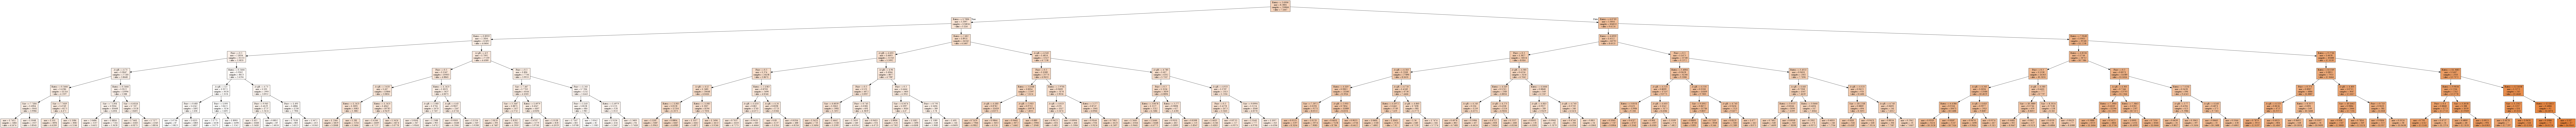

In [9]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
import pydotplus
from IPython.display import Image
dt_feature_names = list(X_train.columns)
dt_target_names = np.array(y_train.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [10]:
y_pred = dt.predict(X_test)

In [11]:
dt.score(X_test, y_test)

0.86763011277672275

In [12]:
(y_test - y_pred).abs().mean()

0.81390379921942257

In [13]:
temp = y_test.values
temp
y_pred

array([  9.21034037,  10.81977828,   6.90775528, ...,   6.90775528,
         9.21034037,   4.60517019])

array([ 7.19477894,  9.96141751,  6.98121009, ...,  7.64619746,
        9.89504259,  5.48716897])

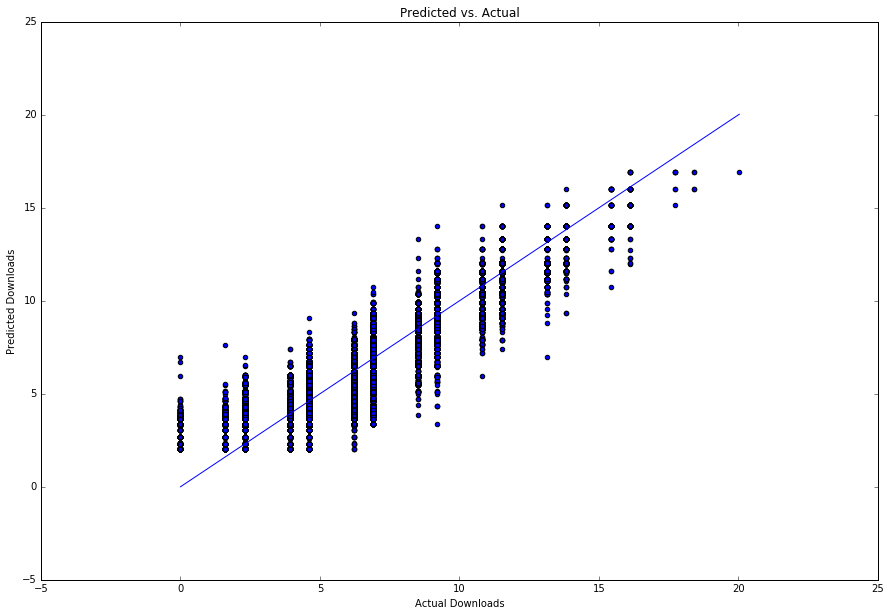

In [14]:
import matplotlib.pylab as plt
% matplotlib inline
plt.figure(figsize=(15, 10))
#y_test = np.linspace(0, y_test.max, 50)
plt.scatter(y_test, y_pred)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Downloads')
plt.ylabel('Predicted Downloads')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
#plt.tight_layout()